# Load Data

In [1]:
from os import listdir
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepaths = glob.glob("../data/tidy/acetaminophen/*_events_*.csv")
df = pd.concat(map(pd.read_csv, filepaths))
df["CLINICAL_EVENT_DATETIME"] = pd.to_datetime(df["CLINICAL_EVENT_DATETIME"])
df.index = df["CLINICAL_EVENT_DATETIME"]

/home/brian/anaconda3/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
apap_daily = df.loc[:"2019-04-30"].resample("MS").count()[["EVENT_ID"]]
apap_daily.columns = ["Doses"]

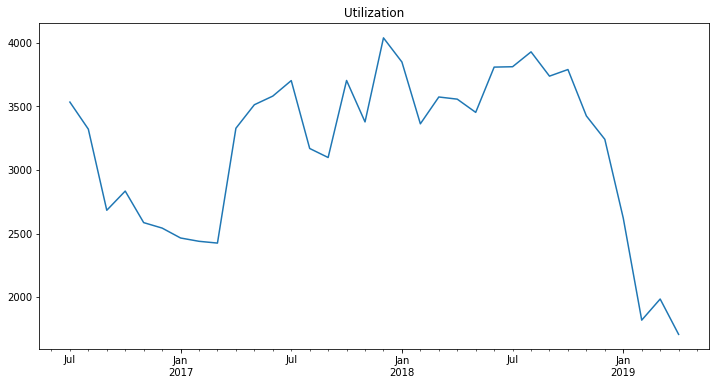

In [9]:
ax = apap_daily.plot(legend=False, figsize=(12, 6), title="Utilization")
ax.set(xlabel="");

## RNN

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

Using TensorFlow backend.


In [28]:
n_inputs = 3
n_features = 1
n_valid = 1
n_pred = 1
batch_size = 1

In [29]:
l = len(apap_daily) - n_pred
train_set = apap_daily.iloc[:l]
train = apap_daily.iloc[:l - n_valid]
valid = apap_daily.iloc[l - n_inputs - n_valid:l]
test_set = apap_daily.iloc[l:]

In [30]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_valid = scaler.transform(valid)
scaled_train_set = scaler.transform(train_set)
scaled_test_set = scaler.transform(test_set)

/home/brian/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
gen_train = TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=batch_size)

In [32]:
gen_valid = TimeseriesGenerator(scaled_valid, scaled_valid, length=n_inputs, batch_size=batch_size)

In [33]:
#for i in range(len(gen_valid)):
#    x, y = gen_valid[i]
#    print('%s => %s' % (x, y))

In [34]:
# int(len(apap_daily) / (2 * (n_inputs + n_features)))
n_nodes = int(2/3 * (n_inputs + n_features))

In [35]:
model = Sequential()
model.add(LSTM(n_nodes, activation="relu", input_shape=(n_inputs, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(n_nodes, activation="relu", input_shape=(n_inputs, n_features), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 2)              32        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 2)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 2)                 40        
_________________________________________________________________
dropout_4 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit_generator(gen_train, epochs=500, validation_data=gen_valid)

Epoch 1/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.2266
Epoch 2/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0603 - val_loss: 0.2252
Epoch 3/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0553 - val_loss: 0.2247
Epoch 4/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0555 - val_loss: 0.2199
Epoch 5/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0537 - val_loss: 0.2271
Epoch 6/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0489 - val_loss: 0.2245
Epoch 7/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0508 - val_loss: 0.2278
Epoch 8/500
29/29 [==============================] - 0s 14ms/step - loss: 0.0535 - val_loss: 0.2285
Epoch 9/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0479 - val_loss: 0.2298
Epoch 10/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0487 - val_loss: 0.2277

29/29 [==============================] - 0s 15ms/step - loss: 0.0506 - val_loss: 0.2333
Epoch 83/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0517 - val_loss: 0.2303
Epoch 84/500
29/29 [==============================] - 0s 14ms/step - loss: 0.0529 - val_loss: 0.2281
Epoch 85/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0559 - val_loss: 0.2300
Epoch 86/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0543 - val_loss: 0.2298
Epoch 87/500
29/29 [==============================] - 1s 19ms/step - loss: 0.0511 - val_loss: 0.2305
Epoch 88/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0588 - val_loss: 0.2339
Epoch 89/500
29/29 [==============================] - 4s 143ms/step - loss: 0.0532 - val_loss: 0.2346
Epoch 90/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0506 - val_loss: 0.2330
Epoch 91/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0510 - val_loss: 0.2294
Ep

29/29 [==============================] - 0s 16ms/step - loss: 0.0549 - val_loss: 0.2216
Epoch 163/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0443 - val_loss: 0.2204
Epoch 164/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0530 - val_loss: 0.2224
Epoch 165/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0439 - val_loss: 0.2212
Epoch 166/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0497 - val_loss: 0.2203
Epoch 167/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.2201
Epoch 168/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0546 - val_loss: 0.2234
Epoch 169/500
29/29 [==============================] - 1s 17ms/step - loss: 0.0514 - val_loss: 0.2220
Epoch 170/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0483 - val_loss: 0.2230
Epoch 171/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0441 - val_loss: 0

29/29 [==============================] - 0s 16ms/step - loss: 0.0461 - val_loss: 0.2292
Epoch 243/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0498 - val_loss: 0.2247
Epoch 244/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0511 - val_loss: 0.2245
Epoch 245/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0535 - val_loss: 0.2246
Epoch 246/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0424 - val_loss: 0.2247
Epoch 247/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0590 - val_loss: 0.2249
Epoch 248/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0542 - val_loss: 0.2284
Epoch 249/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0484 - val_loss: 0.2250
Epoch 250/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0485 - val_loss: 0.2256
Epoch 251/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0554 - val_loss: 0

29/29 [==============================] - 0s 15ms/step - loss: 0.0474 - val_loss: 0.2075
Epoch 323/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0507 - val_loss: 0.2062
Epoch 324/500
29/29 [==============================] - 1s 19ms/step - loss: 0.0434 - val_loss: 0.2085
Epoch 325/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0423 - val_loss: 0.2091
Epoch 326/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0488 - val_loss: 0.2072
Epoch 327/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0489 - val_loss: 0.2048
Epoch 328/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0543 - val_loss: 0.2055
Epoch 329/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0466 - val_loss: 0.2063
Epoch 330/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0526 - val_loss: 0.2074
Epoch 331/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0382 - val_loss: 0

29/29 [==============================] - 0s 16ms/step - loss: 0.0422 - val_loss: 0.2104
Epoch 403/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0441 - val_loss: 0.2066
Epoch 404/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0573 - val_loss: 0.2088
Epoch 405/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0440 - val_loss: 0.2071
Epoch 406/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0483 - val_loss: 0.2045
Epoch 407/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0530 - val_loss: 0.2070
Epoch 408/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0561 - val_loss: 0.2072
Epoch 409/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0440 - val_loss: 0.2102
Epoch 410/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0513 - val_loss: 0.2121
Epoch 411/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0539 - val_loss: 0

29/29 [==============================] - 0s 17ms/step - loss: 0.0558 - val_loss: 0.2076
Epoch 483/500
29/29 [==============================] - 0s 17ms/step - loss: 0.0426 - val_loss: 0.2082
Epoch 484/500
29/29 [==============================] - 0s 14ms/step - loss: 0.0440 - val_loss: 0.2038
Epoch 485/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0463 - val_loss: 0.2042
Epoch 486/500
29/29 [==============================] - 0s 13ms/step - loss: 0.0403 - val_loss: 0.2020
Epoch 487/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0356 - val_loss: 0.1984
Epoch 488/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0527 - val_loss: 0.1995
Epoch 489/500
29/29 [==============================] - 0s 16ms/step - loss: 0.0543 - val_loss: 0.2035
Epoch 490/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0470 - val_loss: 0.2025
Epoch 491/500
29/29 [==============================] - 0s 15ms/step - loss: 0.0388 - val_loss: 0

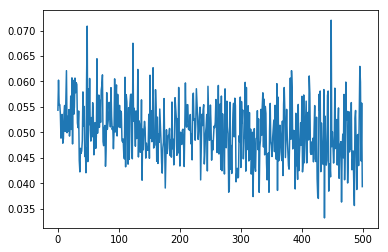

In [46]:
model.history.history.keys()
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [47]:
test_preds = []
first_batch = scaled_train_set[-n_inputs:]
current_batch = first_batch.reshape((batch_size, n_inputs, n_features))

for i in range(len(test_set)):
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [48]:
true_preds = scaler.inverse_transform(test_preds)
test_set["Predictions"] = true_preds

/home/brian/anaconda3/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


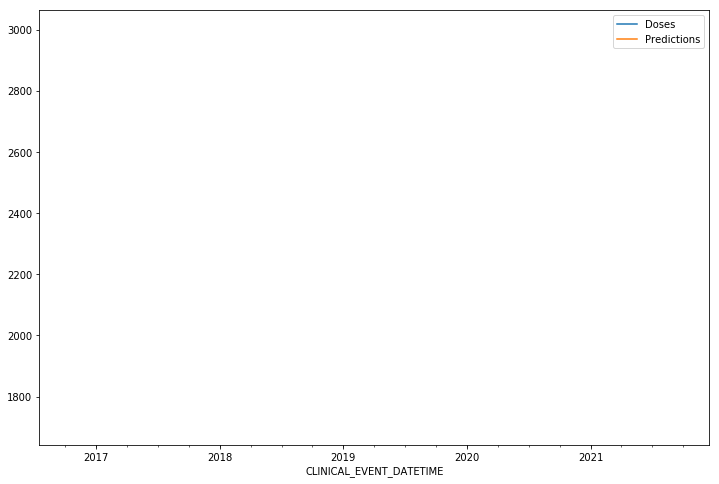

In [49]:
test_set.plot(figsize=(12, 8));

In [50]:
mse_rnn = mean_squared_error(test_set["Doses"], test_set["Predictions"])
rmse_rnn = rmse(test_set["Doses"],  test_set["Predictions"])

print(f'MSE RNN: {mse_rnn:11.10}')
print(f'RMSE RNN: {rmse_rnn:11.10}')

MSE RNN: 1670024.753
RMSE RNN: 1292.294375


# Forecast

In [51]:
n_fcast = 12
new_preds = []
first_batch = scaler.transform(apap_daily[-n_inputs:])
current_batch = first_batch.reshape((batch_size, n_inputs, n_features))

for i in range(n_fcast):
    current_pred = model.predict(current_batch)[0]
    new_preds.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [52]:
unscaled_preds = scaler.inverse_transform(new_preds)
df_preds = pd.DataFrame(unscaled_preds, columns=["Predictions"])
idx = pd.date_range(apap_daily.index[-1] + 1, periods = n_fcast, freq="MS")
df_preds.index = idx

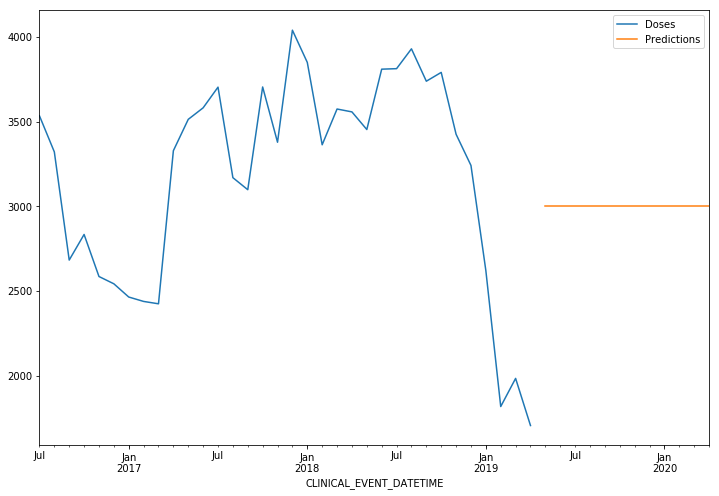

In [53]:
ax = apap_daily["Doses"].plot(figsize=(12, 8), legend=True)
df_preds["Predictions"].plot(legend=True);
ax.autoscale(axis='x',tight=True)